# Práctica de Laboratorio 2: Regresión Logística

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
archivos = ["diabetes","Enfermedad_Cardiaca"]

In [45]:
def leer_datos(archivo):
    return np.genfromtxt(archivo+".csv", delimiter='\t', skip_header=1)

def dividir_X_y(datos):
    X = datos[:,:-1]
    y = datos[:,-1:]
    return X, y

def normalizar_datos(datos):
    media = datos.mean(axis=0)
    desv_est = datos.std(axis=0)
    datos = (datos - media)/ desv_est
    return datos, media, desv_est

def sigmoidal(X, t):
    return 1 / (1 + np.exp(-np.matmul(X, t)))

def calcular_funcion_costo(X, y, t):
    htx = sigmoidal(X, t)
    costo = np.sum( (y * np.log(htx)) + ((1-y) * np.log(1-htx)) )
    costo = (-costo)/X.shape[0]
    return costo

def calcular_gradiente(X, y, t):
    gradiente = sigmoidal(X, t) - y
    gradiente = np.matmul(np.transpose(X), gradiente)
    gradiente = np.divide(gradiente, y.shape[0])
    return gradiente

def gradiente_descendiente(X, y, t, num_it, tasa_apren):
    costos = np.zeros(num_it)
    for i in range(num_it):
        gradiente = calcular_gradiente(X, y, t)
        t = t - np.multiply(gradiente, tasa_apren)
        costos[i] = calcular_funcion_costo(X, y, t)
    return t, costos

def calcular_accuraccy(X, y, t):
    htxP = sigmoidal(X, t) > 0.5
    n_1s = np.logical_xor(np.logical_not(htxP), y)
    return np.sum(n_1s) / y.shape[0]

def crear_k_folds(data_Nor, k):
    np.random.shuffle(data_Nor)
    size_fold = int(data_Nor.shape[0] / k)
    resto = int(data_Nor.shape[0] % k)
    data_Nor = data_Nor[:data_Nor.shape[0]-resto,:]
    k_folds = []
    index = 0
    for i in range(k):
        X, y = dividir_X_y(data_Nor[index:index+size_fold, :])
        k_folds.append({"X": X, "y" : y})
        index += size_fold
    return k_folds, size_fold

## Experimento 1

In [49]:
n_it = [500, 1000, 1500, 2000, 2500, 3000, 3500]
tasas_aprendizaje = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
k = 3

for archivo in archivos:
    data = leer_datos(archivo)
    data = normalizar_datos(data)[0]
    k_folds, size_fold = crear_k_folds(data, k)

    tabla_accuraccy = []
    for it in n_it:
        learn_rate_row = []
        for tasa in tasas_aprendizaje:
            media_accuraccy = 0.0
            for i in range(k):
                X_train = np.zeros((size_fold * (k - 1), data.shape[1] - 1))
                X_test = np.zeros((size_fold, data.shape[1] - 1))
                y_train = np.zeros((size_fold * (k - 1), 1))
                y_test = np.zeros((size_fold, 1))

                index = 0
                for j in range(k):
                    if j == i:
                        X_test = k_folds[i]['X']
                        y_test = k_folds[i]['y']
                    else:
                        X_train[index:index + size_fold, :] = k_folds[j]['X']
                        y_train[index:index + size_fold, :] = k_folds[j]['y']
                        index += size_fold

                y_train = np.reshape(y_train, y_train.shape[0])
                y_test = np.reshape(y_test, y_test.shape[0])
                t = np.zeros(X_train.shape[1])
                t, costs = gradiente_descendiente(X_train, y_train, t, it, tasa)

                media_accuraccy += calcular_accuraccy(X_test, y_test, t)

            media_accuraccy /= k
            learn_rate_row.append(media_accuraccy)
        tabla_accuraccy.append(learn_rate_row)
    tabla_accuraccy = pd.DataFrame(tabla_accuraccy, columns=tasas_aprendizaje, index=n_it)
    print(archivo)
    print(tabla_accuraccy)

C:\Users\y3r03\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\y3r03\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


diabetes
          0.01      0.05      0.10      0.20      0.30      0.40
500   0.472656  0.470052  0.470052  0.470052  0.467448  0.467448
1000  0.464844  0.470052  0.470052  0.467448  0.467448  0.468750
1500  0.471354  0.470052  0.467448  0.467448  0.468750  0.467448
2000  0.472656  0.470052  0.467448  0.468750  0.467448  0.467448
2500  0.470052  0.468750  0.467448  0.467448  0.467448  0.467448
3000  0.468750  0.467448  0.467448  0.467448  0.467448  0.467448
3500  0.470052  0.467448  0.468750  0.467448  0.467448  0.467448


C:\Users\y3r03\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\y3r03\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Users\y3r03\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Enfermedad_Cardiaca
          0.01      0.05      0.10      0.20      0.30      0.40
500   0.574257  0.574257  0.574257  0.574257  0.574257  0.574257
1000  0.570957  0.574257  0.574257  0.574257  0.574257  0.574257
1500  0.570957  0.574257  0.574257  0.574257  0.570957  0.570957
2000  0.574257  0.574257  0.574257  0.574257  0.570957  0.570957
2500  0.574257  0.574257  0.574257  0.570957  0.570957  0.570957
3000  0.574257  0.574257  0.574257  0.570957  0.570957  0.567657
3500  0.574257  0.574257  0.574257  0.570957  0.570957  0.567657


## Experimento 2

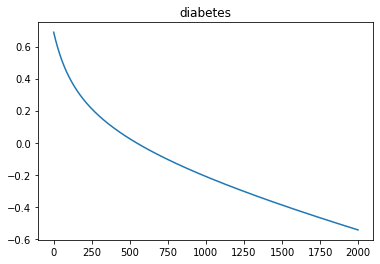

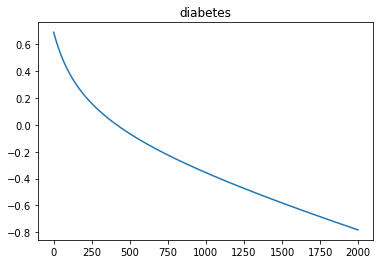

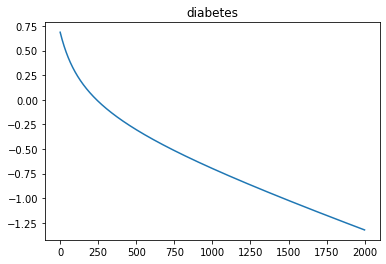

C:\Users\y3r03\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


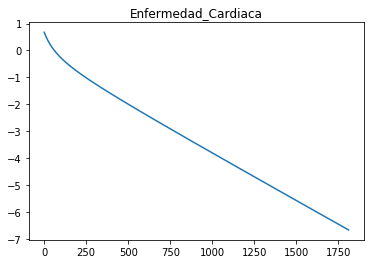

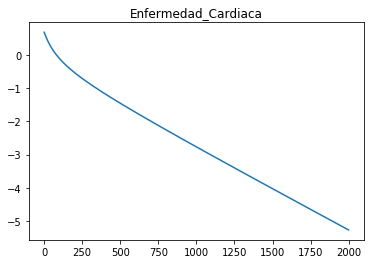

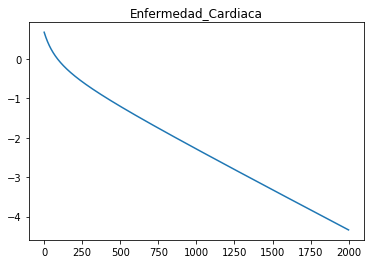

In [50]:
tasa = 0.01
n_it = 2000
k = 3

for archivo in archivos:
    data = leer_datos(archivo)
    data = normalizar_datos(data)[0]
    k_folds, size_fold = crear_k_folds(data, k)

    for i in range(k):
        X_train = np.zeros((size_fold * (k - 1), data.shape[1] - 1))
        X_test = np.zeros((size_fold, data.shape[1] - 1))

        y_train = np.zeros((size_fold * (k - 1), 1))
        y_test = np.zeros((size_fold, 1))

        index = 0
        for j in range(k):
            if j == i:
                X_test = k_folds[i]['X']
                y_test = k_folds[i]['y']
            else:
                X_train[index:index + size_fold, :] = k_folds[j]['X']
                y_train[index:index + size_fold, :] = k_folds[j]['y']
                index += size_fold

        y_train = np.reshape(y_train, y_train.shape[0])
        y_test = np.reshape(y_test, y_test.shape[0])

        t = np.zeros(X_test.shape[1])
        costos = gradiente_descendiente(X_test, y_test, t, n_it, tasa)[1]
        plt.title(archivo)
        plt.plot(costos)
        plt.show()